# Modeling

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.formula.api as smf
import statsmodels as sm

In [2]:
X_train = pd.read_csv('X_train.csv', index_col=0)
X_test = pd.read_csv('X_test.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0)
y_test = pd.read_csv('y_test.csv', index_col=0)

In [3]:
train_data = pd.concat([X_train, y_train], axis = 1)
train_data.shape

(16197, 21)

In [4]:
# sns.pairplot(train_data)
# plt.show()

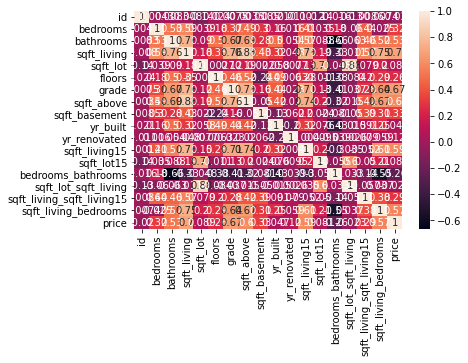

In [5]:
sns.heatmap(train_data.corr(), annot=True)
plt.show()

In [6]:
corr = train_data.corr()
corr['price'].sort_values(ascending=False)

price                        1.000000
sqft_living                  0.700397
grade                        0.671702
sqft_above                   0.601355
sqft_living15                0.591150
sqft_living_bedrooms         0.573421
bathrooms                    0.529906
sqft_basement                0.326849
bedrooms                     0.320253
sqft_living_sqft_living15    0.294823
floors                       0.257826
yr_renovated                 0.116552
sqft_lot                     0.089019
sqft_lot15                   0.080682
yr_built                     0.046835
id                          -0.019919
sqft_lot_sqft_living        -0.022818
bedrooms_bathrooms          -0.255742
Name: price, dtype: float64

In [7]:
train_data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedrooms_bathrooms,sqft_lot_sqft_living,sqft_living_sqft_living15,sqft_living_bedrooms,price
count,1.619700e+04,16197.000000,16197.000000,16197.000000,1.619700e+04,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,1.619700e+04
mean,4.596556e+09,3.372229,2.116426,2083.693030,1.507189e+04,1.494752,7.658702,1790.467926,287.657159,1971.019942,67.419522,1987.809286,12784.065074,1.750182,7.326601,1.053928,619.321692,5.412845e+05
std,2.888074e+09,0.905951,0.768049,918.209756,4.077585e+04,0.540474,1.169277,827.598600,440.726697,29.325399,360.641442,685.189105,26833.379871,0.653123,19.599984,0.319392,216.114350,3.663447e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000,0.400000,0.214876,0.248344,200.000000,7.800000e+04
25%,2.122049e+09,3.000000,1.750000,1430.000000,5.058000e+03,1.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,1490.000000,5100.000000,1.333333,2.447619,0.883495,470.000000,3.235000e+05
50%,3.905082e+09,3.000000,2.250000,1912.000000,7.620000e+03,1.500000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000,1.600000,4.037186,1.000000,577.500000,4.500000e+05
75%,7.338403e+09,4.000000,2.500000,2560.000000,1.072000e+04,2.000000,8.000000,2220.000000,550.000000,1997.000000,0.000000,2360.000000,10086.000000,2.000000,6.405229,1.161383,725.000000,6.450000e+05
max,9.900000e+09,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000,8.000000,1270.276154,6.000000,3000.000000,7.700000e+06


In [8]:
# features = X_train.columns

# for x in features:
#     plt.scatter(X_train[x], y_train)
#     plt.title(f'Plot of Price against {x}')
#     plt.xlabel(x)
#     plt.ylabel('Price')
#     plt.show()
    
# # also plot sales against itself
# plt.scatter(y_train.index, y_train)
# plt.hlines(y_train.mean(), 0, 200)
# plt.xlabel('Index Value')
# plt.ylabel('Price')
# plt.title('Variance of Sales')
# plt.show()

<AxesSubplot:>

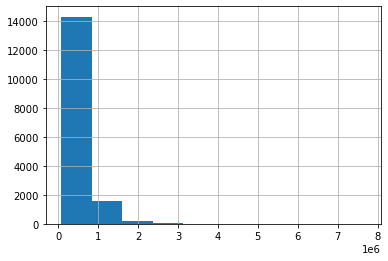

In [9]:
train_data['price'].hist()

<AxesSubplot:>

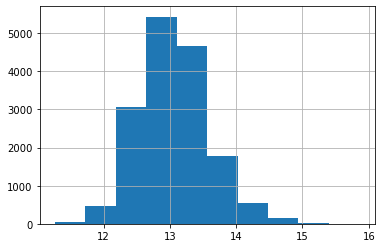

In [10]:
y_scld = np.log(train_data['price'])
y_scld.hist()

<AxesSubplot:>

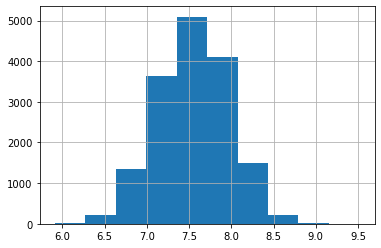

In [11]:
X_scld = np.log(train_data['sqft_living'])
X_scld.hist()

## Explore house features

`sqrt_living`
`sqft_living_bedrooms`
`bathrooms`
`bedrooms_bathrooms`


In [12]:
house_features = train_data[['bedrooms', 'bathrooms', 'sqft_living', 'bedrooms_bathrooms','sqft_living_sqft_living15', 'sqft_living_bedrooms','price']]

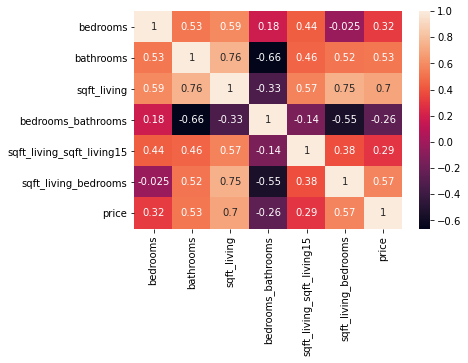

In [13]:
sns.heatmap(house_features.corr(), annot=True)
plt.show()

In [14]:
house_features.describe()

,bedrooms,bathrooms,sqft_living,bedrooms_bathrooms,sqft_living_sqft_living15,sqft_living_bedrooms,price
count,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,1.619700e+04
mean,3.372229,2.116426,2083.693030,1.750182,1.053928,619.321692,5.412845e+05
std,0.905951,0.768049,918.209756,0.653123,0.319392,216.114350,3.663447e+05
min,1.000000,0.500000,370.000000,0.400000,0.248344,200.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,1.333333,0.883495,470.000000,3.235000e+05
50%,3.000000,2.250000,1912.000000,1.600000,1.000000,577.500000,4.500000e+05
75%,4.000000,2.500000,2560.000000,2.000000,1.161383,725.000000,6.450000e+05
max,11.000000,8.000000,13540.000000,8.000000,6.000000,3000.000000,7.700000e+06


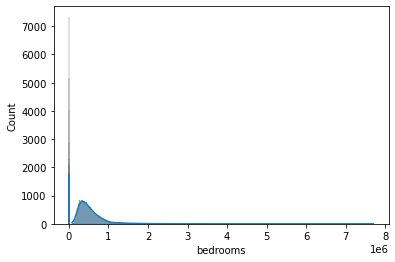

In [15]:
for feature in house_features.columns: 
    sns.histplot(data=house_features, x=house_features[feature], kde=True)

Modeling house features

In [16]:
formulas = []
for feature in house_features.columns: 
    formulas.append('price ~ '+feature)

formulas

['price ~ bedrooms',
 'price ~ bathrooms',
 'price ~ sqft_living',
 'price ~ bedrooms_bathrooms',
 'price ~ sqft_living_sqft_living15',
 'price ~ sqft_living_bedrooms',
 'price ~ price']

In [17]:
for formula in formulas: 
    model = smf.ols(formula=formula, data=house_features).fit()
    print(formula)
    print(model.summary())
    print('**************')

price ~ bedrooms
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     1851.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:16:04   Log-Likelihood:            -2.2961e+05
No. Observations:               16197   AIC:                         4.592e+05
Df Residuals:                   16195   BIC:                         4.592e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.046e+05   1.05e+04   

In [18]:
for formula in formulas: 
    model = smf.ols(formula=formula, data=house_features).fit()
    print(formula)
    print(f' R2: {model.rsquared}')
    print('*********************')

price ~ bedrooms
 R2: 0.10256226715687988
*********************
price ~ bathrooms
 R2: 0.2808006163146518
*********************
price ~ sqft_living
 R2: 0.4905555579182034
*********************
price ~ bedrooms_bathrooms
 R2: 0.06540385823353467
*********************
price ~ sqft_living_sqft_living15
 R2: 0.0869203072841539
*********************
price ~ sqft_living_bedrooms
 R2: 0.32881194196514196
*********************
price ~ price
 R2: 1.0
*********************


Non-normal

In [19]:
#scaling house features
scaled_features = pd.DataFrame()

for feature in house_features.columns:
    scaled_features[feature+"_log"] = np.log(house_features[feature])
    pass


In [20]:
formulas = []
for feature in scaled_features.columns: 
    formulas.append('price ~ '+feature)

formulas

['price ~ bedrooms_log',
 'price ~ bathrooms_log',
 'price ~ sqft_living_log',
 'price ~ bedrooms_bathrooms_log',
 'price ~ sqft_living_sqft_living15_log',
 'price ~ sqft_living_bedrooms_log',
 'price ~ price_log']

In [23]:
scaled_features['price'] = house_features['price']

In [24]:
for formula in formulas: 
    model = smf.ols(formula=formula, data=scaled_features).fit()
    print(formula)
    print(f' R2: {model.rsquared}')
    print('*********************')

price ~ bedrooms_log
 R2: 0.09131428338763459
*********************
price ~ bathrooms_log
 R2: 0.21151024375148386
*********************
price ~ sqft_living_log
 R2: 0.37610519237757434
*********************
price ~ bedrooms_bathrooms_log
 R2: 0.07806768310561663
*********************
price ~ sqft_living_sqft_living15_log
 R2: 0.08139878470943296
*********************
price ~ sqft_living_bedrooms_log
 R2: 0.29142448304013613
*********************
price ~ price_log
 R2: 0.8010338183508541
*********************


In [55]:
formulas = []
for feature in scaled_features.columns: 
    formulas.append('price_log ~ '+feature)

formulas

['price_log ~ bedrooms_log',
 'price_log ~ bathrooms_log',
 'price_log ~ sqft_living_log',
 'price_log ~ bedrooms_bathrooms_log',
 'price_log ~ sqft_living_sqft_living15_log',
 'price_log ~ sqft_living_bedrooms_log',
 'price_log ~ price_log',
 'price_log ~ price']

In [56]:
for formula in formulas: 
    model = smf.ols(formula=formula, data=scaled_features).fit()
    print(formula)
    print(f' R2: {model.rsquared}')
    print('*********************')

price_log ~ bedrooms_log
 R2: 0.11715338481357795
*********************
price_log ~ bathrooms_log
 R2: 0.2730121647583049
*********************
price_log ~ sqft_living_log
 R2: 0.45498814193077897
*********************
price_log ~ bedrooms_bathrooms_log
 R2: 0.10132079377384717
*********************
price_log ~ sqft_living_sqft_living15_log
 R2: 0.09358602701444718
*********************
price_log ~ sqft_living_bedrooms_log
 R2: 0.34228847245307137
*********************
price_log ~ price_log
 R2: 1.0
*********************
price_log ~ price
 R2: 0.8010338183508541
*********************


All house features

In [46]:
features = house_features.columns[:-1]

In [49]:
formula = 'price ~'+" + ".join(features)
model = smf.ols(formula=formula, data=house_features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     3038.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:28:13   Log-Likelihood:            -2.2438e+05
No. Observations:               16197   AIC:                         4.488e+05
Df Residuals:                   16190   BIC:                         4.488e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  6.866e+04   2.67e+04      2.574      0.010    1.64e+04    1.21e+05
bedrooms                  -1.651e+05   6653.168    -24.822      0.000   -1.78e+05   -1.52e+05
bathrooms                  1.372e+05   8019.776     17.110      0.000    1.21e+05    1.53e+05
sqft_living                 393.8217      9.248     42.583      0.000     375.694     411.950
bedrooms_bathrooms         1.315e+05   7436.151     17.684      0.000    1.17e+05    1.46e+05
sqft_living_sqft_living15 -1.468e+05   7668.284    -19.138      0.000   -1.62e+05   -1.32e+05
sqft_living_bedrooms       -253.4320     30.818     -8.223      0.000    -313.840    -193.025
==============================================================================
Omnibus:                     9119.551   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           189435.709
Skew:                           2.280   Prob(JB):                         0.00
Kurtosis:                      19.122   Cond. No.                     3.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## "Regular house"

<AxesSubplot:xlabel='bedrooms_bathrooms', ylabel='price'>

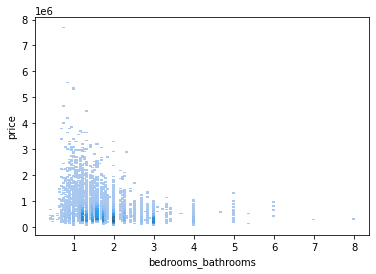

In [54]:
x, y = house_features['bedrooms_bathrooms'], house_features['price']
sns.histplot(data=house_features, x=x, y=y)

In [64]:
formula = 'price ~ sqft_living + bedrooms_bathrooms'
model = smf.ols(formula=formula, data=house_features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     7817.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:37:28   Log-Likelihood:            -2.2501e+05
No. Observations:               16197   AIC:                         4.500e+05
Df Residuals:                   16194   BIC:                         4.501e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -6864.1159   9034.620     -0.760      0.447   -2.46e+04    1.08e+04
sqft_living          275.8603      2.370    116.417      0.000     271.216     280.505
bedrooms_bathrooms -1.523e+04   3331.351     -4.572      0.000   -2.18e+04   -8702.639
==============================================================================
Omnibus:                    10493.789   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           297294.933
Skew:                           2.675   Prob(JB):                         0.00
Kurtosis:                      23.295   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='bedrooms_bathrooms_log', ylabel='price_log'>

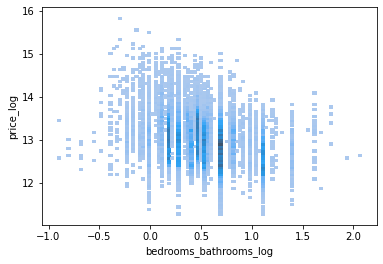

In [65]:
x, y = scaled_features['bedrooms_bathrooms_log'], scaled_features['price_log']
sns.histplot(data=house_features, x=x, y=y)

In [67]:
formula = 'price_log ~ sqft_living_log + bedrooms_bathrooms_log'
model = smf.ols(formula=formula, data=scaled_features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     7004.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:55:13   Log-Likelihood:                -7571.8
No. Observations:               16197   AIC:                         1.515e+04
Df Residuals:                   16194   BIC:                         1.517e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7.1141      0.059    119.886      0.000       6.998       7.230
sqft_living_log            0.7962      0.008    104.629      0.000       0.781       0.811
bedrooms_bathrooms_log    -0.1553      0.010    -16.311      0.000      -0.174      -0.137
==============================================================================
Omnibus:                      117.428   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.999
Skew:                           0.176   Prob(JB):                     4.78e-25
Kurtosis:                       2.796   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='sqft_living_bedrooms', ylabel='price'>

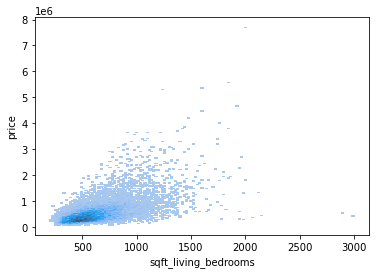

In [63]:
x, y = house_features['sqft_living_bedrooms'], house_features['price']
sns.histplot(data=house_features, x=x, y=y)

## Outliers

sqft_living, grade OR grade_category, sqft_living_bedrooms

In [73]:
train_df = train_data.select_dtypes(include='number')

In [74]:
train_df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedrooms_bathrooms,sqft_lot_sqft_living,sqft_living_sqft_living15,sqft_living_bedrooms,price
count,1.619700e+04,16197.000000,16197.000000,16197.000000,1.619700e+04,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,1.619700e+04
mean,4.596556e+09,3.372229,2.116426,2083.693030,1.507189e+04,1.494752,7.658702,1790.467926,287.657159,1971.019942,67.419522,1987.809286,12784.065074,1.750182,7.326601,1.053928,619.321692,5.412845e+05
std,2.888074e+09,0.905951,0.768049,918.209756,4.077585e+04,0.540474,1.169277,827.598600,440.726697,29.325399,360.641442,685.189105,26833.379871,0.653123,19.599984,0.319392,216.114350,3.663447e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000,0.400000,0.214876,0.248344,200.000000,7.800000e+04
25%,2.122049e+09,3.000000,1.750000,1430.000000,5.058000e+03,1.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,1490.000000,5100.000000,1.333333,2.447619,0.883495,470.000000,3.235000e+05
50%,3.905082e+09,3.000000,2.250000,1912.000000,7.620000e+03,1.500000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000,1.600000,4.037186,1.000000,577.500000,4.500000e+05
75%,7.338403e+09,4.000000,2.500000,2560.000000,1.072000e+04,2.000000,8.000000,2220.000000,550.000000,1997.000000,0.000000,2360.000000,10086.000000,2.000000,6.405229,1.161383,725.000000,6.450000e+05
max,9.900000e+09,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000,8.000000,1270.276154,6.000000,3000.000000,7.700000e+06


5.0